In [102]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random

# Import our customized functions from
sys.path.insert(0, '/strategies.py')
sys.path.insert(0, '/pdFunctions.py')
from strategies import Nice_guy, Bad_guy
from pdFunctions import IPD, MIPD, rMIPD, createPlayers, plot_cunsum, barPlot, plot_box_multiple, plot_box

# Prisoner's Dilemma

## Abstract

## Overview
   Prisoners dilemma is a standard example of a game analyzed in game theory that shows why two completely rational individuals might not cooperate, even if it appears that it is in their best interests to do so. It was originally framed by Merrill Flood and Melvin Dresher while working at RAND in 1950. [1]

The structure of two players Prisoner's Dilemma is that the two players are represented by the colors, red and blue, and that each player chooses to either "Cooperate" or "Defect".

If both players cooperate, they both receive the reward R for cooperating. If both players defect, they both receive the punishment payoff P. If Blue defects while Red cooperates, then Blue receives the temptation payoff T, while Red receives the "sucker's" payoff, S. Similarly, if Blue cooperates while Red defects, then Blue receives the sucker's payoff S, while Red receives the temptation payoff T as shown in Figure "1".


<span style="color:blue">Blue</span> -<span style="color:red">Red</span>   | Cooperate | Defect
------------- | -------------| -------------
Cooperate | <span style="color:blue">R</span> - <span style="color:red">R</span> | <span style="color:blue">S</span> - <span style="color:red">T</span>
Defect  | <span style="color:blue">T</span> - <span style="color:red">S</span>  | <span style="color:blue">P</span> - <span style="color:red">P</span>

and to be a prisoner's dilemma game in the strong sense, the following condition must hold for the payoffs:

> T > R > P > S

## Implementation
 A true prisoners dilemma is typically played only once or else it is classified as an iterated prisoners dilemma. In an iterated prisoners dilemma, the players can choose strategies that reward co-operation or punish defection over time. By repeatedly interacting with the same individuals we can even deliberately move from a one-time prisoners dilemma to a repeated prisoners dilemma.

iterated prisoners dilemma has mny determinsitic strategies, and the following are the implemented ones:
+ Nice guy: always cooperate.
+ Bad guy: always defect.
+ Main bad: randomly defect k% of the times and cooperate 100-k%,k<50%
+ Main nice: randomly defect k% of the times and cooperate 100-k%, k>50%
+ Tit for tat (TFT): start by cooperating, then repeat what the opponent has done in the previous move.
+ Tit For Two Tats: Cooperates on the first move, and defects only when the opponent defects two times.
+ Suspicious Tit For Tat: Same as TFT, except that it defects on the first move.
+ Grudger: A player starts by cooperating however will defect if at any point the opponent has defected.
+ Go By Majority: A player examines the history of the opponent: if the opponent has more defections than cooperations then the player defects.


To apply the algorithm of prisoners delimma, the following functions are implemented:
```
IPD(player1, player2, turns=1)
```
Iterated prisoners delimma between two players implementing two given strategies.
parameters: 
1. palyer1: the first player.
2. player2: the second player.
3. turns: the number of turns.

returns: Matrix of the score of each player in each turn.
example of the result for 10 turns and 2 players with strategies Main bad and bad guy.
 [[2, 0, 0, 2, 0, 0, 2, 0, 2, 2],
 [2, 3, 3, 2, 3, 3, 2, 3, 2, 2]]
```
MIPD(players, turns=1, mode=1)
```
Implement a multiple players IPD, where several strategies play against each other in a roud-robin scheme.

parametes:
palyers: the array of players.
turns: number of turns.
mode: 1 or 0; controls the output values
	0; output = The score of each player in each turn.
	1; output = The total score of each palyer for his matches with other players.

example of 3 players in 10 turns:
mode 0
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]]
mode 1
[[ 0.  0.  0.]
 [30.  0. 10.]
 [30. 10.  0.]]

 rMIPD(players, turns=1,iters=1, alfa=0.5)
 implemetes repeated MIPD,  where strategies are allowed to mutate. A parameter (gene) encodes the attidue of an individual to cooperate, such gene can mutate randomly and the corresponding phenotype should compete in the MPIPD such that the best-fitted is determined.
 parameters:
players: list of objects of type Player
turns: number of turns of each match between two players
iters: number of iterations
alfa: the probabilty for a player to mutate,
eg. alfa = 1, removes its effect; all players will change their strategies in each iteration.
alfa = -1, alfa will be calculated for each strategy according to it's scores.
returns:
iterPlayers: 2D array of Player objects for the number of iterations and the number of players
iterScores: 2D array for the total scores of each player in one iteration
totals: array of the total score of all players in one iteration.
## results
...
...
### Repeated multiple players iterated prisoners dilemma (rMIPD)
Basically this method iterates MIPD for several iterations, each iteration represents new generation which has new strategy distribution depending on their scores in previous generation(iteration).
The population used to analyze this function is as follows:
10 nice-guy, 10 bad-guy and 10 main-bad players.

In [3]:
players = createPlayers([['nice guy', 10], ['bad guy', 10], ['main bad', 10]])

In [77]:
# iterPlayers is a matrix of Player objects
# iterPlayers.shape = (number_of_iterations, number_of_players)
def plot_iterPlayers(iterPlayers):
    iterPlayers = np.array(iterPlayers)
    strats = {}
    iterations = iterPlayers.shape[0]
    # count the number of players for each strategy in each iteration
    # result => strats = {startegyName:[num_of_players_in_iteration_1, ...iteration_2, _3,...,.._15]}
    for i,iP in enumerate(iterPlayers):
        for player in iP:
            strategyName = player.getName()
            if(strategyName not in strats):
                strats[strategyName] = np.zeros(iterations)
            strats[strategyName][i] += 1
    fig, ax = plt.subplots(figsize=(8, 4))
    for strat in strats:
        r = lambda: random.randint(20,200)
        g = lambda: random.randint(20,200)
        b = lambda: random.randint(20,200)
        color = '#{:02x}{:02x}{:02x}'.format(r(), g(), b())
        y = np.asarray(strats[strat])
        x = range(1,iterations+1)
        ax.plot(x, y, 'k--', linewidth=1.5, label=strat, color=color)
    # tidy up the figure
    ax.grid(True)
    ax.legend(loc='right')
    ax.set_title('Number of players for each strategy over generations')
    ax.set_xlabel('iterations')
    ax.set_ylabel('number of players')
    plt.show()

In [96]:
# Plot totals
def plot_totals(totals):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(totals)
    ax.set_title('Total score for all players in each generation')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Total score')
    plt.show()

Then we run the rMIPD function with turns = 10 and iterations = 15

In [94]:
iterPlayers, iterScores, totals = rMIPD(players,10,15,1)

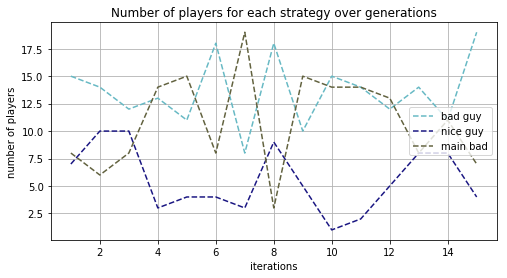

In [95]:
plot_iterPlayers(iterPlayers)

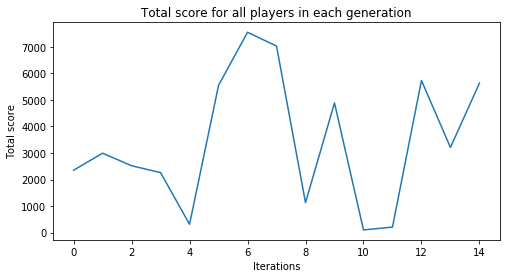

In [97]:
plot_totals(totals)

In the previous plots we notice that the overall behaviour of the population is tend to be random, the reason for that is that for each new iteration a whole new population is generated without taking into acount the previous strategy distribution, hence to enhance the simulation a gene(alfa) is added to be the probabilty of a player to change his strategy in the next iteration.
In this experiment we will start by setting alfa = 0.5, which means each player will change his strategy by 50% probability. 

In [71]:
iterPlayers2, iterScores2, totals2 = rMIPD(players,10,15,alfa=0.5)

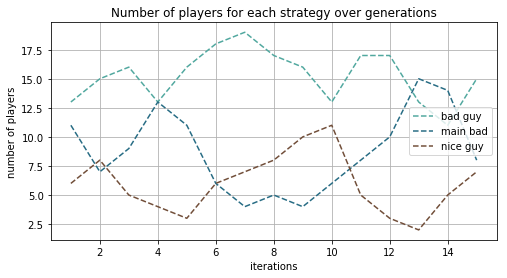

In [74]:
plot_iterPlayers(iterPlayers2)

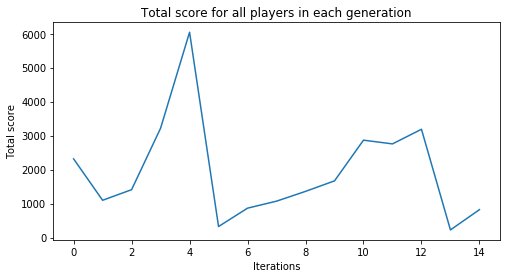

In [75]:
plot_totals(totals2)

**Adaptive alfa** is the third mode of this function, where each strategy has a different alfa according to its score in previous iteration.
to activate this mode, we set alfa to -1

In [85]:
iterPlayers3, iterScores3, totals3 = rMIPD(players,10,15,alfa=-1)

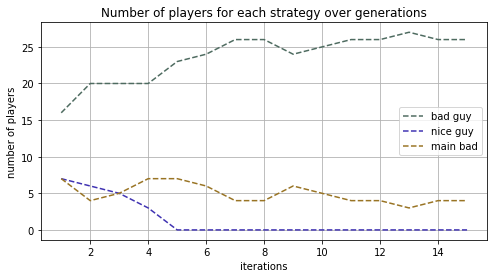

In [86]:
plot_iterPlayers(iterPlayers3)

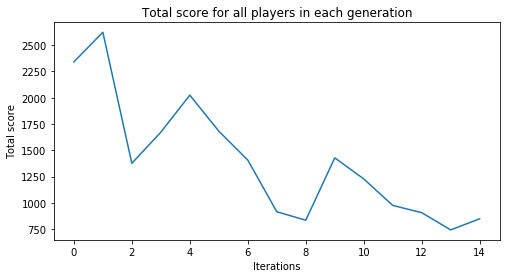

In [87]:
plot_totals(totals3)